Step 1: Counting Segments for Each Character

In [1]:
import time

t_1 = time.time()

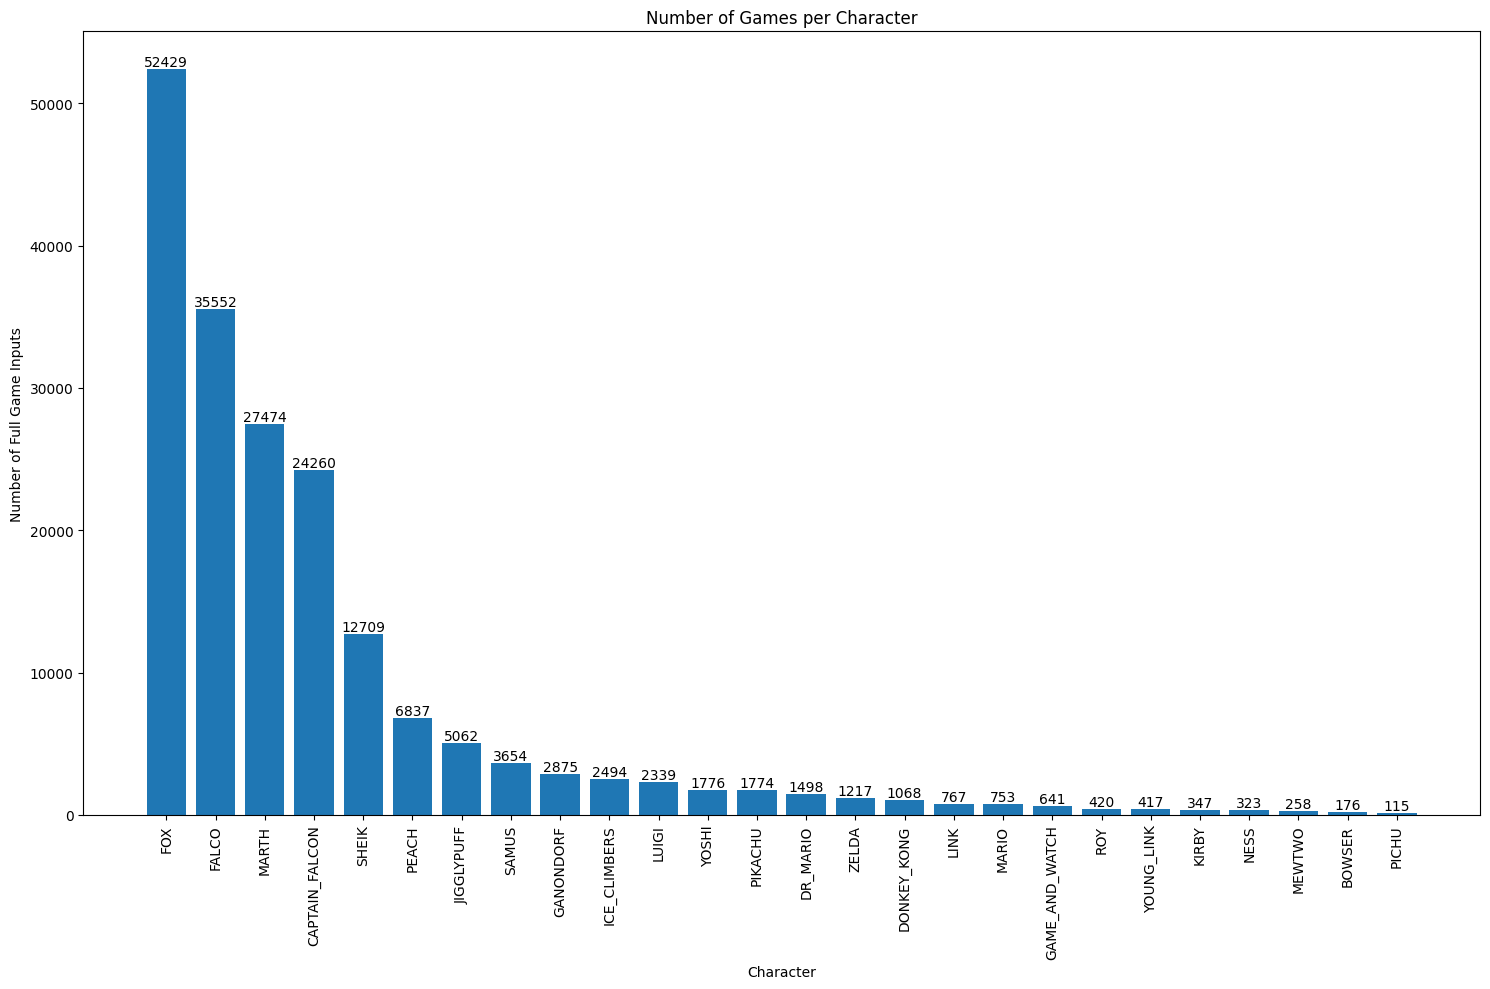

In [2]:
import os
from collections import defaultdict
import matplotlib.pyplot as plt

# dataset_path = 'C:/Users/jaspa/Grant ML/slp/data/full_2_player_game_inputs'
dataset_path = 'C:/Users/jaspa/Grant ML/full_2_player_game_inputs'
# dataset_path = 'D:/segment_2_player_game_inputs'

# Initialize a dictionary to count segments for each character
character_counts_full = defaultdict(int)

# List all files in the directory
for filename in os.listdir(dataset_path):
    if filename.endswith('.npy.gz'):
    # if filename.endswith('.npy'):
        character = filename.split('_port')[0]  # Extract character name from the filename
        character_counts_full[character] += 1

# Sort characters by the number of segments
sorted_characters = sorted(character_counts_full.items(), key=lambda x: x[1], reverse=True)

# Unpack the characters and counts for plotting
characters, counts = zip(*sorted_characters)

# Plotting
plt.figure(figsize=(15, 10))
bars = plt.bar(characters, counts)
plt.xlabel('Character')
plt.ylabel('Number of Full Game Inputs')
plt.xticks(rotation=90, ha='center')  # Rotate the labels to 90 degrees and center align them
plt.title('Number of Games per Character')

# Adding the count above each bar
for bar, count in zip(bars, counts):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, yval, int(count), va='bottom', ha='center')

plt.tight_layout()  # Adjust the layout to make room for the rotated labels
plt.show()

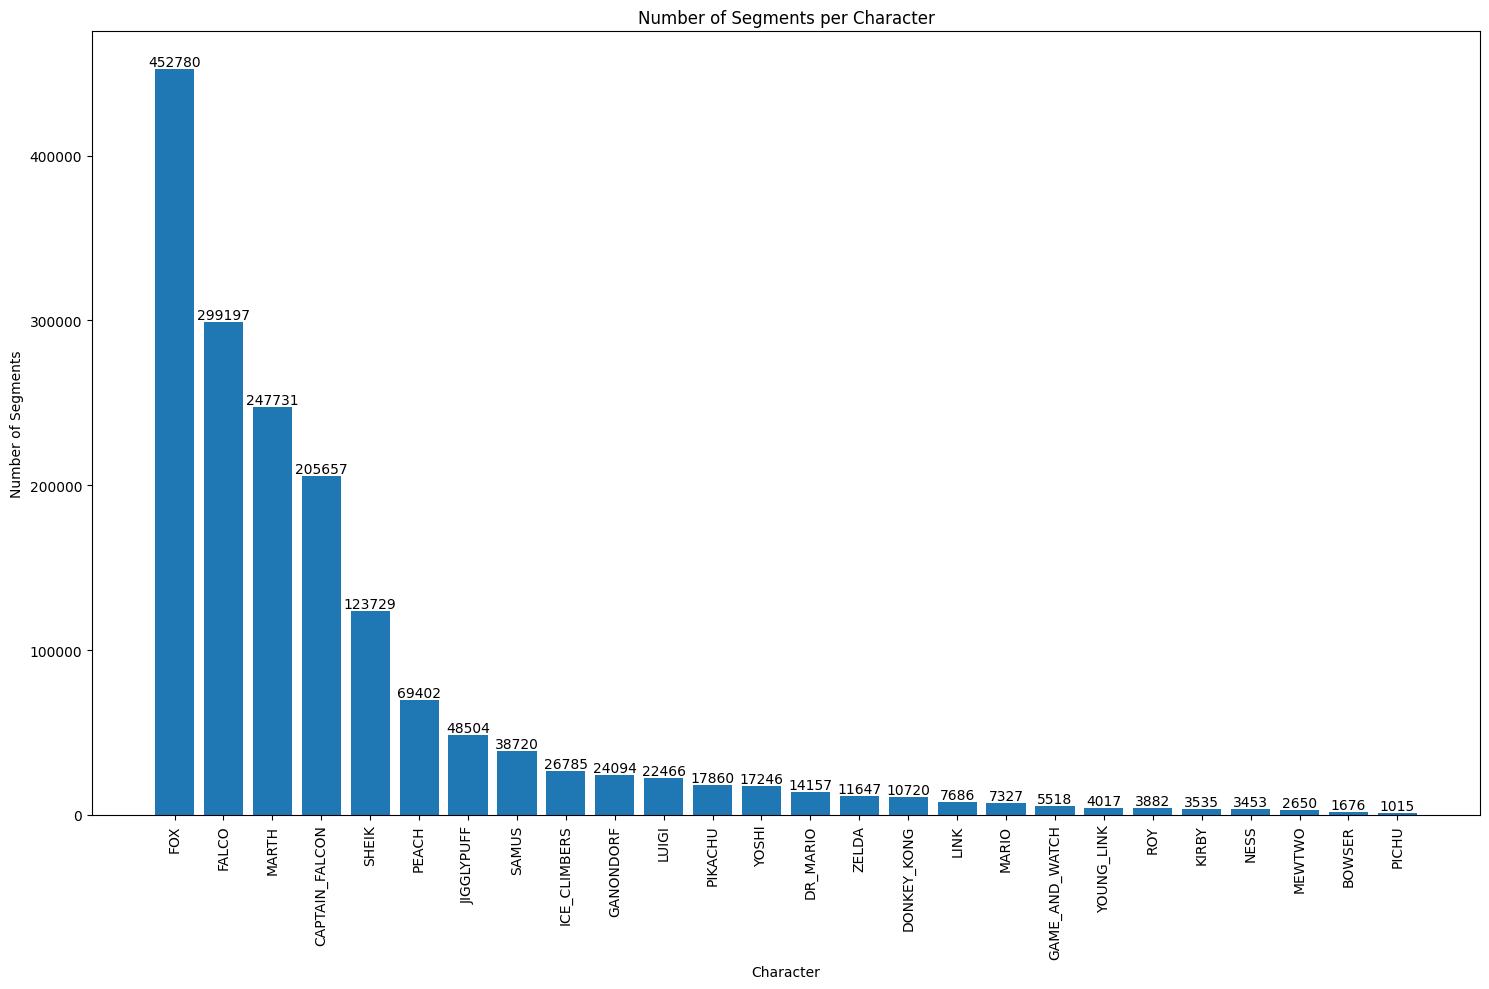

In [3]:
import os
from collections import defaultdict
import matplotlib.pyplot as plt

dataset_path = 'C:/Users/jaspa/Grant ML/segment_2_player_game_inputs'
# dataset_path = 'D:/segment_2_player_game_inputs'

# dataset_path = 'C:/Users/jaspa/Grant ML/slp/data/full_2_player_game_inputs'

# Initialize a dictionary to count segments for each character
character_counts = defaultdict(int)

# List all files in the directory
for filename in os.listdir(dataset_path):
    if filename.endswith('.npy.gz'):
    # if filename.endswith('.npy'):
        character = filename.split('_port')[0]  # Extract character name from the filename
        character_counts[character] += 1

# Sort characters by the number of segments
sorted_characters = sorted(character_counts.items(), key=lambda x: x[1], reverse=True)

# Unpack the characters and counts for plotting
characters, counts = zip(*sorted_characters)

# Plotting
plt.figure(figsize=(15, 10))
bars = plt.bar(characters, counts)
plt.xlabel('Character')
plt.ylabel('Number of Segments')
plt.xticks(rotation=90, ha='center')  # Rotate the labels to 90 degrees and center align them
plt.title('Number of Segments per Character')

# Adding the count above each bar
for bar, count in zip(bars, counts):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, yval, int(count), va='bottom', ha='center')

plt.tight_layout()  # Adjust the layout to make room for the rotated labels
plt.show()



Step 2 & 3: Gathering File Paths and Labels for Selected Characters

In [ ]:
selected_characters = ['FOX',  'SHEIK',]#"PEACH",'CAPTAIN_FALCON', 'MARTH',]#'FALCO']
min_segments = min(character_counts[char] for char in selected_characters)
# min_segments = 5000
file_paths = []
labels = {char: idx for idx, char in enumerate(selected_characters)}
label_list = []

# Gather file paths and labels
for character in selected_characters:
    count = 0
    for filename in os.listdir(dataset_path):
        if filename.startswith(character) and count < min_segments:
            file_paths.append(os.path.join(dataset_path, filename))
            label_list.append(labels[character])
            count += 1

# Verify the lengths
print(f"Total files selected: {len(file_paths)}")


Step 4: Saving Lists to Disk
We'll save the file_paths and label_list to disk using the pickle module for easy retrieval.

In [ ]:
import pickle

save_path = 'C:/Users/jaspa/Grant ML/slp/data/'

# Save file_paths
with open(os.path.join(save_path, 'file_paths.pkl'), 'wb') as f:
    pickle.dump(file_paths, f)

# Save label_list
with open(os.path.join(save_path, 'label_list.pkl'), 'wb') as f:
    pickle.dump(label_list, f)

print("Lists saved successfully.")


In [ ]:
# import gzip
# import numpy as np
# with gzip.open(file_paths[1], 'rb') as f:
#             segment = np.load(f)
            
# print(segment.shape)

In [ ]:
total_time = time.time() - t_1

print('total time ', total_time)

In [ ]:
print(character_counts)
import math
character_counts_root = {k:math.ceil(math.sqrt(v)) for (k,v) in character_counts.items()}
print(character_counts_root)

In [ ]:
print(character_counts_full)
import math
character_counts_full_root = {k:math.ceil(math.sqrt(v)) for (k,v) in character_counts_full.items()}
print(character_counts_full_root)